In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
names = [80, 96, 112, 128]

time = pd.DataFrame()

for name in names:
    dataframe = pd.read_csv(f'../raw_data/dataset_03/log_200_{name}000.txt', sep='\t', header=None)
    extracted_info = dataframe[18].str.extract(r'User=(\d+\.\d+)s Real=(\d+\.\d+)s Sys=(\d+\.\d+)s \[Cpu=(\d+\.\d+)%\]')
    extracted_info.columns = ['User', 'Real', 'Sys', 'Cpu']
    time = pd.concat([time, extracted_info.Real.astype(float)], ignore_index=True)

time = pd.concat([time, time], ignore_index=True)
time.columns = ["Time"]

time

,Time
0,2.646813
1,0.018754
2,0.048918
3,0.045920
4,0.017986
...,...
127995,0.020775
127996,0.026064
127997,0.029622
127998,0.021769


In [74]:
time.describe()

,Time
count,126472.000000
mean,0.036950
std,0.021096
min,0.012507
25%,0.024873
50%,0.030607
75%,0.041018
max,0.199909


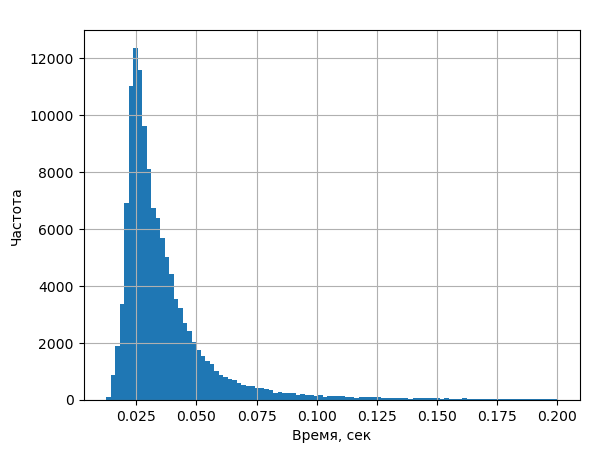

In [79]:
time.Time = time.Time[time.Time < 0.2]
hist = time.hist(bins=100)
plt.title(' ')
plt.xlabel('Время, сек')
plt.ylabel('Частота')
plt.show()